#CS6910: Deep Learning - Assignment 1: Fashion MNIST dataset

Shibobrota Das (CS20M059) | Abhishek Kumar (CS20M007)

In [4]:
!pip install wandb -qqq

     |████████████████████████████████| 2.0MB 7.8MB/s 
     |████████████████████████████████| 133kB 42.5MB/s 
     |████████████████████████████████| 163kB 43.3MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 


In [25]:
# import wandb
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from scipy.special import expit
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="Assignment-1")

# #Solution 1

**Load Dataset from fashion_mnist and log one sample from each set**

In [6]:
(train_x, train_y), (test_x, test_y)= fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


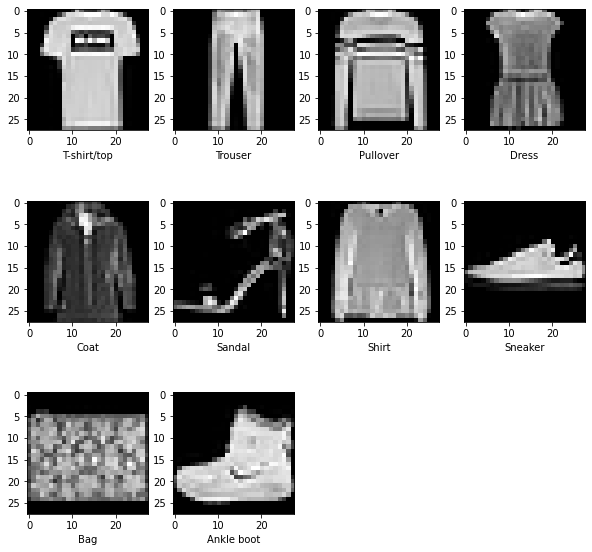

In [62]:
class_values, unique_indices = np.unique(train_y, return_index=True)
plt.figure(figsize=(10,10))
labelled_images = {}
for d in range(10):
  plt.subplot(3, 4, d+1)
  plt.imshow(train_x[unique_indices[d]], cmap=plt.get_cmap('gray'))
  plt.xlabel(classes[class_values[d]])
  labelled_images[classes[class_values[d]]] = train_x[unique_indices[d]]
plt.show()

In [ ]:
wandb.log({"A1-Examples": [wandb.Image(img, caption=cap) for cap,img in labelled_images.items()]})

#Solution 2

**Implemention of feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.**

In [7]:
#Reshape 2D Matrix into 1D Vector
train_x = train_x.reshape(len(train_x), 28 ** 2)
test_x = test_x.reshape(len(test_x), 28 ** 2)

#Normalizing data
train_x = train_x/255.0
test_x = test_x/255.0

#Splitting Data
val_x = train_x[-6000:]
train_x = train_x[:54000]
val_y = train_y[-6000:]
train_y = train_y[:54000]

In [8]:
#Activation function Def

def relu(z):
  temp = x * (x > 0)  #learnt from https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy
  return temp

def sigmoid(z):
  return expit(z)

def tanh(z):
  numerator = np.exp(z)-np.exp(-z)
  denominator = np.exp(z)+np.exp(-z)
  return numerator/denominator

In [9]:
#Output Function

def softmax(z):
  exps = np.exp(z)
  sum_exps = np.sum(exps)
  return exps / sum_exps

def softmax_stb(z):
  x=np.array(z,dtype=np.longdouble)
  z = x - max(x)
  exps = np.exp(z)
  sum_exps = np.sum(exps)
  return exps / sum_exps

In [10]:
#Activation function derivative Def

def grad_tanh(x):
  return 1-(tanh(x) ** 2)

def grad_sigmoid(x):
  sig_x = sigmoid(x)
  return sig_x*(1-sig_x)

def grad_relu(x):
  temp = return 1. * (x > 0) #learnt from https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy
  return temp

In [11]:
#Type Initialization
RANDOM = "random"
XAVIER = "xavier"
ZEROES = "zeroes"

#Definitions

def init_weights(type: str, layers):
    W = list()
    for i in range(len(layers)-1):
      if type == RANDOM:
          W.append(np.random.normal(size=(layers[i+1], layers[i])))
      elif type == XAVIER:
          W.append(np.random.normal(0, np.sqrt(1/layers[i+1]), size=(layers[i+1], layers[i])))
      else:
          W.append(np.zeros((layers[i+1], layers[i])))
    return W

def init_bias(type: str, layers):
    B = list()
    for i in range(len(layers)-1):
      if type == RANDOM:
        B.append(np.random.normal(size=(layers[i+1])))
      else:
        B.append(np.zeros(int(layers[i+1])))
    return B

In [12]:
def init_params(type: str, layers):
  return init_weights(type, layers), init_bias(type, layers)

In [13]:
#Type Initialization
SIGMOID = "sigmoid"
TAN_H = "tanh"
RELU = "relu"

#Definitions

def grad(activation: str, pre_act_vector):
  #increase precision
  pre_act_vector = np.array(pre_act_vector,dtype=np.longdouble)
  if activation == TAN_H:
    return grad_tanh(pre_act_vector)
  elif activation == SIGMOID:
    return grad_sigmoid(pre_act_vector)
  elif activation == RELU:
    return grad_relu(pre_act_vector)
  return None

def activate(activation: str, pre_act_vector):
  #increase precision
  pre_act_vector = np.array(pre_act_vector,dtype=np.longdouble)
  if activation == TAN_H:
    return tanh(pre_act_vector)
  elif activation == SIGMOID:
    return sigmoid(pre_act_vector)
  elif activation == RELU:
    return relu(pre_act_vector)
  return None

**Algorithm: Forward Propagation**

In [14]:
#Forward Propagation

def forward_propagation(activation, W, B, H_0):
  L = len(B)
  A = list()
  H = [H_0]
  for k in range(L-1):
    t = np.matmul(W[k],  H[k])
    if len(np.shape(t)) == 2:
      t = t.flat
    A.append(np.add(B[k], t))
    H.append(activate(activation, A[k]))
  kt = np.add(B[L-1], np.matmul(W[L-1],H[L-1]))
  if len(np.shape(kt)) == 2:
    kt = kt.flat
  A.append(kt)
  H.append(softmax_stb(A[L-1]))
  return A, H

Testing Forward Propagation



In [50]:
# #Initialize the layer info - number of neurons per layer
# layers = [len(train_x[0])] + [500] * 2 + [10]

# #Initialize network the parameters
# W, B = init_params(XAVIER, layers)

# #Forward prop
# A, H = forward_propagation(SIGMOID, W, B, train_x[0])

#Solution 3

Implementation of backpropagation algorithm with support for the following optimisation functions:

- sgd
- momentum based gradient descent
- nesterov accelerated gradient descent
- rmsprop
- adam
- nadam

**Algorithm: Back Propagation**

In [15]:
#Back Propagation

def back_propogation(activation, label, H, A, W):
  L = len(H) - 1
  grad_W = [None] * L
  grad_B = [None] * L
  grad_H = [None] * L
  grad_A = [None] * L
  one_hot_y = np.zeros(len(H[L]))
  one_hot_y[label] = 1
  grad_A[L-1] = -(one_hot_y - H[L])
  for k in range(L-1, -1, -1):
      grad_W[k] = np.matmul(np.mat(grad_A[k]).T,np.mat(H[k]))
      grad_B[k] = grad_A[k]
      if k > 0:
        grad_H[k-1] = np.matmul(W[k].T, grad_A[k])
        grad_A[k-1] = np.multiply(grad_H[k-1],grad(activation,A[k-1]))
        if len(np.shape(grad_A[k-1])) == 2:
          grad_A[k-1] = grad_A[k-1].flat
  return grad_B, grad_W

In [ ]:
# #Back prop
# dB, dw = back_propogation(SIGMOID, 1, H, A, W)

**Algorithm: Stochastic Gradient Descent(SGD)**

In [16]:
#SGD

def stochastic_gradient_descent(activation, eta, epochs, init_type, layers, train_data, train_labels, batch_size = 1):
    W, B = init_params(init_type, layers)
    num_images_seen = 0
    for epoch in range(epochs):
      for i in range(len(train_data)):
        #Forward prop
        A, H = forward_propagation(activation, W, B, train_data[i])
        #Back prop
        dB, dW = back_propogation(activation, train_labels[i], H, A, W)
        num_images_seen += 1
        if num_images_seen % batch_size == 0:
          #Parameter Update
          for offset in range(len(W)):
            W[offset] = np.subtract(W[offset], np.multiply(eta, dW[offset]))
            B[offset] = np.subtract(B[offset], np.multiply(eta, dB[offset]))       
    return W, B

In [ ]:
# #SGD exec

# eta = 0.001
# layers = [len(train_x[0])] + [16] * 1 + [10]
# epochs = 1
# W, B = stochastic_gradient_descent(SIGMOID, eta, epochs, XAVIER, layers, train_x, train_y, 16)

**Algorithm: Momentum based gradient descent**

In [17]:
#Momentum based Gradient Descent

def momentum_based_gradient_descent(activation, eta, epochs, init_type, layers, train_data, train_labels, batch_size = 1, gamma = 0.9):
    W, B = init_params(init_type, layers)
    num_images_seen = 0
    update_W, update_B = init_params(ZEROES, layers)
    for epoch in range(epochs):
      for i in range(len(train_data)):
        #Forward prop
        A, H = forward_propagation(activation, W, B, train_data[i])
        #Back prop
        dB, dW = back_propogation(activation, train_labels[i], H, A, W)
        #Calculate momentum
        for offset in range(len(dW)):
          update_W[offset] = np.add(np.multiply(gamma, update_W[offset]), np.multiply(eta, dW[offset]))
          update_B[offset] = np.add(np.multiply(gamma, update_B[offset]), np.multiply(eta, dB[offset]))
        #Counter for mini-batch update 
        num_images_seen += 1
        if num_images_seen % batch_size == 0:
          #Parameter Update
          for offset in range(len(W)):
            W[offset] = np.subtract(W[offset], update_W[offset])
            B[offset] = np.subtract(B[offset], update_B[offset])       
    return W, B

In [18]:
# #Momentum based GD exec

# eta = 0.001
# layers = [len(train_x[0])] + [16] * 1 + [10]
# epochs = 1
# batch_size = 16
# W, B = momentum_based_gradient_descent(SIGMOID, eta, epochs, XAVIER, layers, train_x, train_y, batch_size)

**Algorithm: Nesterov Accelerated Gradient Descent**

In [19]:
#NAG definition

def nesterov_accelerated_gradient_descent(activation, eta, epochs, init_type, layers, train_data, train_labels, batch_size = 1, gamma = 0.9):
    W, B = init_params(init_type, layers)
    num_images_seen = 0
    update_W, update_B = init_params(ZEROES, layers)
    lookahead_W, lookahead_B = init_params(ZEROES, layers)
    for epoch in range(epochs):
      for i in range(len(train_data)):
        #Partial Update
        for offset in range(len(W)):
          lookahead_W[offset] = np.subtract(W[offset], np.multiply(gamma, update_W[offset]))
          lookahead_B[offset] = np.subtract(B[offset], np.multiply(gamma, update_B[offset]))
        #Forward prop
        A, H = forward_propagation(activation, lookahead_W, lookahead_B, train_data[i])
        #Back prop
        dB, dW = back_propogation(activation, train_labels[i], H, A, lookahead_W)
        #Calculate momentum
        for offset in range(len(dW)):
          update_W[offset] = np.add(np.multiply(gamma, update_W[offset]), np.multiply(eta, dW[offset]))
          update_B[offset] = np.add(np.multiply(gamma, update_B[offset]), np.multiply(eta, dB[offset]))
        #Counter for mini-batch update 
        num_images_seen += 1
        if num_images_seen % batch_size == 0:
          #Parameter Update
          for offset in range(len(W)):
            W[offset] = np.subtract(W[offset], update_W[offset])
            B[offset] = np.subtract(B[offset], update_B[offset])    
    return W, B

In [20]:
# #NAG exec

# eta = 0.001
# layers = [len(train_x[0])] + [16] * 1 + [10]
# epochs = 1
# batch_size = 16
# W, B = nesterov_accelerated_gradient_descent(SIGMOID, eta, epochs, XAVIER, layers, train_x, train_y, batch_size)

**Algorithm: RMSProp**

In [21]:
#RMSProp definition

def rms_prop(activation, eta, epochs, init_type, layers, train_data, train_labels, batch_size = 1, beta = 0.9, epsilon = 1e-10):
    W, B = init_params(init_type, layers)
    num_images_seen = 0
    v_W, v_B = init_params(ZEROES, layers)
    for epoch in range(epochs):
      for i in range(len(train_data)):
        #Forward prop
        A, H = forward_propagation(activation, W, B, train_data[i])
        #Back prop
        dB, dW = back_propogation(activation, train_labels[i], H, A, W)
        #Accumulate Updates
        for offset in range(len(dW)):
          v_W[offset] = v_W[offset] + dW[offset] #np.add()
          v_B[offset] = v_B[offset] + dB[offset] #np.add()
        #Counter for mini-batch update 
        num_images_seen += 1
        if num_images_seen % batch_size == 0:
          #calculate v
          v_W = [beta*v_tW + np.multiply((1-beta), (np.power(grad_W, 2))) for v_tW, grad_W in zip(v_W, dW)]
          v_B = [beta*v_tB + np.multiply((1-beta), (np.power(grad_B, 2))) for v_tB, grad_B in zip(v_B, dB)]
          # #Parameter Update
          v_W = [np.add(epsilon, el) for el in v_W]
          v_B = [np.add(epsilon, el) for el in v_B]
          for mat in v_W:
            for vect in mat:
              vect[vect < 0.] = 1e-40
          for vect in v_B:
            vect[vect < 0.] = 1e-40
          v_W = [eta/np.sqrt(el) for el in v_W]
          v_B = [eta/np.sqrt(el) for el in v_B]
          W = np.subtract(W, v_W)
          B = np.subtract(B, v_B)
          v_W, v_B = init_params(ZEROES, layers)      
    return W, B

In [ ]:
# #RMSProp exec

# eta = 0.001
# layers = [len(train_x[0])] + [8] * 1 + [10]
# epochs = 1
# batch_size = 16
# W, B = rms_prop(SIGMOID, eta, epochs, XAVIER, layers, val_x, val_y, batch_size)

#Solution 4

Using the sweep functionality provided by wandb to find the best values for the hyperparameters listed below. We will use the standard train/test split of fashion_mnist (use (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()).  Keeping 10% of the training data aside as validation data for this hyperparameter search.

- number of epochs: 2, 5, 10
- number of hidden layers:  3, 5, 7
- size of every hidden layer:  16, 32, 64, 128
- learning rate: 1e-3, 1e-4 
- optimizer:  sgd, momentum, nesterov, rmsprop
- batch size: 16, 32, 64, 128
- weight initialisation: random, Xavier
- activation functions: sigmoid, tanh, ReLU


In [22]:
SGD = 'sgd'
MOMENTUM = 'momentum'
NAG = 'nesterov'
RMSPROP = 'rmsprop'

sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epochs': {
            'values': [2, 5]
        },
        'layers':{
            'values': [3, 5, 7]
        },
        'each_hidden_layer_size' :{
            'values': [16, 32, 64, 128]
        },
        'learning_rate':{
            'values': [0.001,0.0001]
        },
        'learning_algo':{
            'values': [SGD, MOMENTUM, NAG, RMSPROP]
        },
        'batch_size': {
            'values': [16,32,64,128]
        },
        'init_weights_n_bias':{
            'values': [RANDOM, XAVIER]
        },
        'activation':{
            'values': [SIGMOID, TAN_H, RELU]
        }
    }
}

In [23]:
#Default params

default = {
        'epochs':3,
        'layers':4,
        'each_hidden_layer_size':128,
        'learning_rate':0.0001,
        'learning_rate':0.001,
        'learning_algo':NAG,
        'batch_size':16,
        'init_weights_n_bias':XAVIER,
        'activation':RANDOM
    }

In [24]:
# Hyperparameters search

def train_n_test():
    
    # wandb.init(config=config_defaults)

    # config = wandb.config
    config = default

    #Initialize values

    epochs = config["epochs"]

    layers = [len(train_x[0])] + [config['each_hidden_layer_size']] * (config['layers'] - 1) + [10]

    eta = config['learning_rate']

    learning_algo = config['learning_algo']

    batch_size = config['batch_size']

    init_weights_n_bias = config['init_weights_n_bias']

    activation = config['activation']

    W, B = init_params(init_weights_n_bias, layers)

    if learning_algo == SGD:
        W, B = stochastic_gradient_descent(activation, eta, epochs, init_weights_n_bias, layers, train_x, train_y, batch_size)

    elif learning_algo == MOMENTUM:
        W, B = momentum_based_gradient_descent(activation, eta, epochs, init_weights_n_bias, layers, train_x, train_y, batch_size)

    elif learning_algo == NAG:
        W, B = nesterov_accelerated_gradient_descent(activation, eta, epochs, init_weights_n_bias, layers, train_x, train_y, batch_size)

    else:
        W, B = rms_prop(activation, eta, epochs, init_weights_n_bias, layers, val_x, val_y, batch_size)    

    data_set = [(val_x, val_y), (test_x, test_y)]

    for data_x, data_y in data_set:
        #initialize counters
        count=0
        err = 0.0
        prediction_list = list()

        #Calculate details
        for i in range(len(data_x)):
            #Forward prop
            A, H = forward_propagation(activation, W, B, data_x[i])
            y_hat = H[len(H)-1]

            prediction = np.argmax(y_hat)
            prediction_list.append(prediction)

            if prediction == data_y[i]:
                count += 1

            actual = y_hat[data_y[i]]
            if not actual:
                err += -np.log(actual)
        
        accuracy = count/(1+i)
        print('Accuracy:', accuracy)

        error = err/(1+i)
        print('Error:', error)

In [ ]:
train_n_test()